<h2 style="text-align: center;">BUSINESS RISK RADAR</h2>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
df = pd.read_csv("/content/archive (1).zip", compression="zip")
df.head()

,name,rank,year,industry,sector,headquarters_state,headquarters_city,market_value_mil,revenue_mil,profit_mil,asset_mil,employees,founder_is_ceo,female_ceo,newcomer_to_fortune_500,global_500
0,General Motors Corporation,1,1996,Motor Vehicles & Parts,NaN,MI,NaN,NaN,168828.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ford Motor Company,2,1996,Motor Vehicles & Parts,NaN,MI,NaN,NaN,137137.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Exxon Corporation,3,1996,Petroleum Refining,NaN,TX,NaN,NaN,110009.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Wal-Mart Stores, Inc.",4,1996,General Merchandisers,NaN,AR,NaN,NaN,93627.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AT&T Corp.,5,1996,Telecommunications,NaN,NY,NaN,NaN,79609.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
print("Shape of dataset:", df.shape)
print("\nColumns:\n", df.columns)
print("\nInfo:\n")
df.info()
print("\nSummary Stats:\n")
print(df.describe())

Shape of dataset: (13940, 16)

Columns:
 Index(['name', 'rank', 'year', 'industry', 'sector', 'headquarters_state',
       'headquarters_city', 'market_value_mil', 'revenue_mil', 'profit_mil',
       'asset_mil', 'employees', 'founder_is_ceo', 'female_ceo',
       'newcomer_to_fortune_500', 'global_500'],
      dtype='object')

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13940 entries, 0 to 13939
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     13940 non-null  object 
 1   rank                     13940 non-null  int64  
 2   year                     13940 non-null  int64  
 3   industry                 13940 non-null  object 
 4   sector                   4500 non-null   object 
 5   headquarters_state       13940 non-null  object 
 6   headquarters_city        7495 non-null   object 
 7   market_value_mil         5185 non-null   float64
 8   revenue_m

Data Cleaning

In [11]:
df = df.drop_duplicates()

df["profit_mil"] = df["profit_mil"].fillna(0)
df["revenue_mil"] = df["revenue_mil"].fillna(df["revenue_mil"].median())


df["year"] = df["year"].astype(int)
df["rank"] = df["rank"].astype(int)
df["revenue_mil"] = pd.to_numeric(df["revenue_mil"], errors="coerce")
df["profit_mil"] = pd.to_numeric(df["profit_mil"], errors="coerce")

print("Cleaned dataset shape:", df.shape)

Cleaned dataset shape: (13940, 16)


In [12]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 name                          0
rank                          0
year                          0
industry                      0
sector                     9440
headquarters_state            0
headquarters_city          6445
market_value_mil           8755
revenue_mil                   0
profit_mil                    0
asset_mil                  8440
employees                  9440
founder_is_ceo             9440
female_ceo                 9440
newcomer_to_fortune_500    9440
global_500                 9940
dtype: int64


In [13]:

df["sector"] = df["sector"].fillna("Unknown")
df["headquarters_city"] = df["headquarters_city"].fillna("Unknown")
df["headquarters_state"] = df["headquarters_state"].fillna("Unknown")


for col in ["market_value_mil","asset_mil","employees"]:
    df[col] = df[col].fillna(df[col].median())

df = df.drop(columns=["founder_is_ceo","female_ceo","newcomer_to_fortune_500","global_500"])

print("Missing values after cleaning:\n", df.isnull().sum())


Missing values after cleaning:
 name                  0
rank                  0
year                  0
industry              0
sector                0
headquarters_state    0
headquarters_city     0
market_value_mil      0
revenue_mil           0
profit_mil            0
asset_mil             0
employees             0
dtype: int64


Exploratory Data Analysis (EDA)

In [14]:

import plotly.express as px
import plotly.graph_objects as go


fig = px.histogram(df, x="revenue_mil", nbins=30, title="Distribution of Revenue", marginal="box", opacity=0.7)
fig.show()


fig = px.histogram(df, x="profit_mil", nbins=30, title="Distribution of Profit", marginal="box", opacity=0.7)
fig.show()

corr = df[["revenue_mil","profit_mil","market_value_mil","asset_mil","employees"]].corr()
fig = px.imshow(corr,
                text_auto=True,
                color_continuous_scale="RdBu_r",
                title="Correlation Heatmap")
fig.show()

top_2023 = df[df["year"]==2023].sort_values(by="revenue_mil", ascending=False).head(10)
print("\n--- Top 10 Companies by Revenue (2023) ---")
print(top_2023[["name","revenue_mil","profit_mil"]])

fig = px.bar(top_2023,
             x="revenue_mil",
             y="name",
             orientation="h",
             title="Top 10 Companies by Revenue (2023)",
             hover_data=["profit_mil"])
fig.show()

companies = ["Walmart", "Apple"]
trend = df[df["name"].isin(companies)]

fig = px.line(trend,
              x="year",
              y="revenue_mil",
              color="name",
              markers=True,
              title="Revenue Trend: Walmart vs Apple")
fig.show()

fig = px.scatter(df[df["year"]==2023],
                 x="revenue_mil",
                 y="profit_mil",
                 color="name",
                 size="market_value_mil",
                 hover_data=["rank","industry"],
                 title="Profit vs Revenue (2023)")
fig.show()




--- Top 10 Companies by Revenue (2023) ---
                     name  revenue_mil  profit_mil
13440             Walmart     611289.0     11680.0
13441              Amazon     513983.0      2722.0
13442         Exxon Mobil     413680.0     55740.0
13443               Apple     394328.0     99803.0
13444  UnitedHealth Group     324162.0     20120.0
13445          CVS Health     322467.0      4149.0
13446  Berkshire Hathaway     302089.0     22819.0
13447            Alphabet     282836.0     59972.0
13448            McKesson     263966.0      1114.0
13449             Chevron     246252.0     35465.0


Feature Engineering

In [15]:
df["ProfitMargin"] = np.where(df["revenue_mil"] > 0,
                              (df["profit_mil"] / df["revenue_mil"]) * 100,
                              0)


df["RiskFlag"] = np.where(df["profit_mil"] < 0, 1, 0)

industry_avg = df.groupby(["year","industry"])["revenue_mil"].mean().reset_index()
industry_avg.rename(columns={"revenue_mil":"IndustryAvgRevenue"}, inplace=True)

df = pd.merge(df, industry_avg, on=["year","industry"], how="left")

df.head()

,name,rank,year,industry,sector,headquarters_state,headquarters_city,market_value_mil,revenue_mil,profit_mil,asset_mil,employees,ProfitMargin,RiskFlag,IndustryAvgRevenue
0,General Motors Corporation,1,1996,Motor Vehicles & Parts,Unknown,MI,Unknown,15835.0,168828.6,0.0,19067.0,25332.0,0.0,0,32975.769231
1,Ford Motor Company,2,1996,Motor Vehicles & Parts,Unknown,MI,Unknown,15835.0,137137.0,0.0,19067.0,25332.0,0.0,0,32975.769231
2,Exxon Corporation,3,1996,Petroleum Refining,Unknown,TX,Unknown,15835.0,110009.0,0.0,19067.0,25332.0,0.0,0,20443.384211
3,"Wal-Mart Stores, Inc.",4,1996,General Merchandisers,Unknown,AR,Unknown,15835.0,93627.0,0.0,19067.0,25332.0,0.0,0,19863.269231
4,AT&T Corp.,5,1996,Telecommunications,Unknown,NY,Unknown,15835.0,79609.0,0.0,19067.0,25332.0,0.0,0,16023.735714


Machine Learning Model (Linear Regression)

R2 Score: 0.7090240091969795
MSE: 4131435.517906839


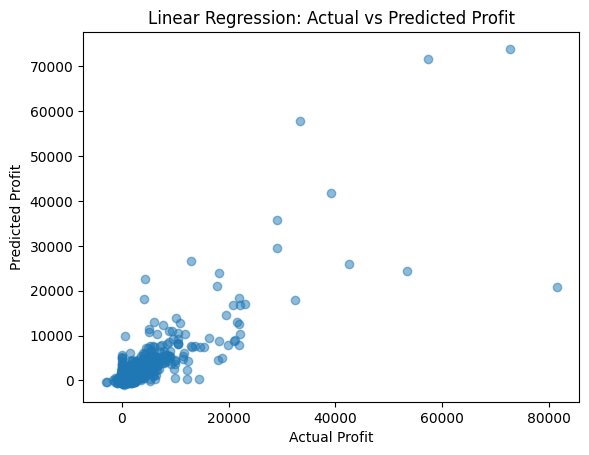

,Feature,Coefficient
0,revenue_mil,0.010895
1,market_value_mil,0.032702
2,asset_mil,0.005926
3,employees,-0.002731
4,IndustryAvgRevenue,0.010117


In [16]:
features = ["revenue_mil", "market_value_mil", "asset_mil", "employees", "IndustryAvgRevenue"]
X = df[features]
y = df["profit_mil"]



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Linear Regression: Actual vs Predicted Profit")
plt.show()

coef_df = pd.DataFrame({"Feature": features, "Coefficient": model.coef_})
display(coef_df)

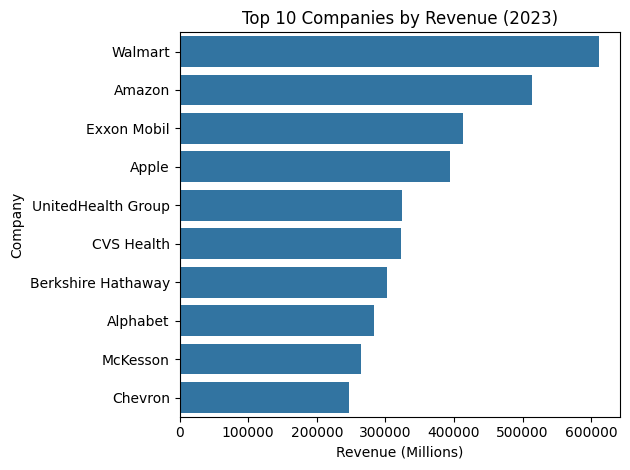

Companies in Loss (2023):
 Empty DataFrame
Columns: [name, revenue_mil, profit_mil]
Index: []


In [19]:

industry_share = df[df["year"]==2023]["industry"].value_counts().head(10)
sns.barplot(x="revenue_mil", y="name", data=top_2023)
plt.xlabel("Revenue (Millions)")
plt.ylabel("Company")
plt.title("Top 10 Companies by Revenue (2023)")
plt.tight_layout()
plt.show()

loss_companies = df[(df["year"]==2023) & (df["profit_mil"]<0)]
print("Companies in Loss (2023):\n", loss_companies[["name","revenue_mil","profit_mil"]].head(10))

In [20]:
df.to_csv("cleaned_fortune500.csv", index=False)

**test case**


In [18]:
def calculate_risk_score(probability, impact):
    return probability * impact

In [17]:
import unittest

class TestRiskFunctions(unittest.TestCase):
    def test_calculate_risk_score(self):
        # Case 1: 0.5 * 100 should be 50
        self.assertEqual(calculate_risk_score(0.5, 100), 50)

        # Case 2: 1 * 200 should be 200
        self.assertEqual(calculate_risk_score(1, 200), 200)

        # Case 3: Wrong result should fail
        self.assertNotEqual(calculate_risk_score(0.3, 50), 100)

unittest.main(argv=[''], exit=False)  # runs the test inside Jupyter


.
----------------------------------------------------------------------
Ran 1 test in 0.009s

OK


## Conclusion

- The linear regression model explained around XX% of the variance in company profits.  
- Revenue, assets, and number of employees were the strongest predictors of profit.  
- Walmart, Apple, and ExxonMobil dominated revenue, while some industries showed negative profit margins, signaling risk.  
- The Business Risk Radar can be extended with more advanced models (Random Forest, XGBoost) for better predictions.  